In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importar Keras y TensorFlow
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

In [9]:
# Cargar FASHION_MNIST desde Keras
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
# Normalizar valores de píxeles a rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar las imágenes de 28x28 a vectores de 784
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

In [2]:
# Sube el modelo anterior
model = keras.models.load_model('autoencoder.keras')

In [3]:
# Extrae sólo la parte del encoder
new_encoder = model.get_layer('encoder')

In [4]:
# Congela todas las capas del encoder
for layer in new_encoder.layers:
    layer.trainable = False

In [6]:
# Nuevo modelo de clasificación a partir del encoder y el vector latente
x = new_encoder.output
x = keras.layers.Dense(64, activation="relu")(x)
output = keras.layers.Dense(10, activation="softmax")(x)

model_final = keras.Model(inputs=new_encoder.input, outputs=output)


In [7]:
model_final.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [12]:
history = model_final.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8577 - loss: 0.3855 - val_accuracy: 0.8504 - val_loss: 0.4106
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8575 - loss: 0.3843 - val_accuracy: 0.8380 - val_loss: 0.4251
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8552 - loss: 0.3889 - val_accuracy: 0.8518 - val_loss: 0.4001
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8591 - loss: 0.3834 - val_accuracy: 0.8491 - val_loss: 0.4094
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8573 - loss: 0.3793 - val_accuracy: 0.8519 - val_loss: 0.3938
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8599 - loss: 0.3783 - val_accuracy: 0.8553 - val_loss: 0.3886
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8615 - loss: 0.3682 - val_accuracy: 0.8585 - val_loss: 0.3889
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8636 - loss: 0.3717 - 

In [18]:
loss, accuracy = model_final.evaluate(x_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8532 - loss: 0.4123
Loss: 0.41817939281463623
Accuracy: 0.849399983882904


In [19]:
y_pred_probs = model_final.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [20]:
y_pred = np.argmax(y_pred_probs, axis=1)

In [22]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


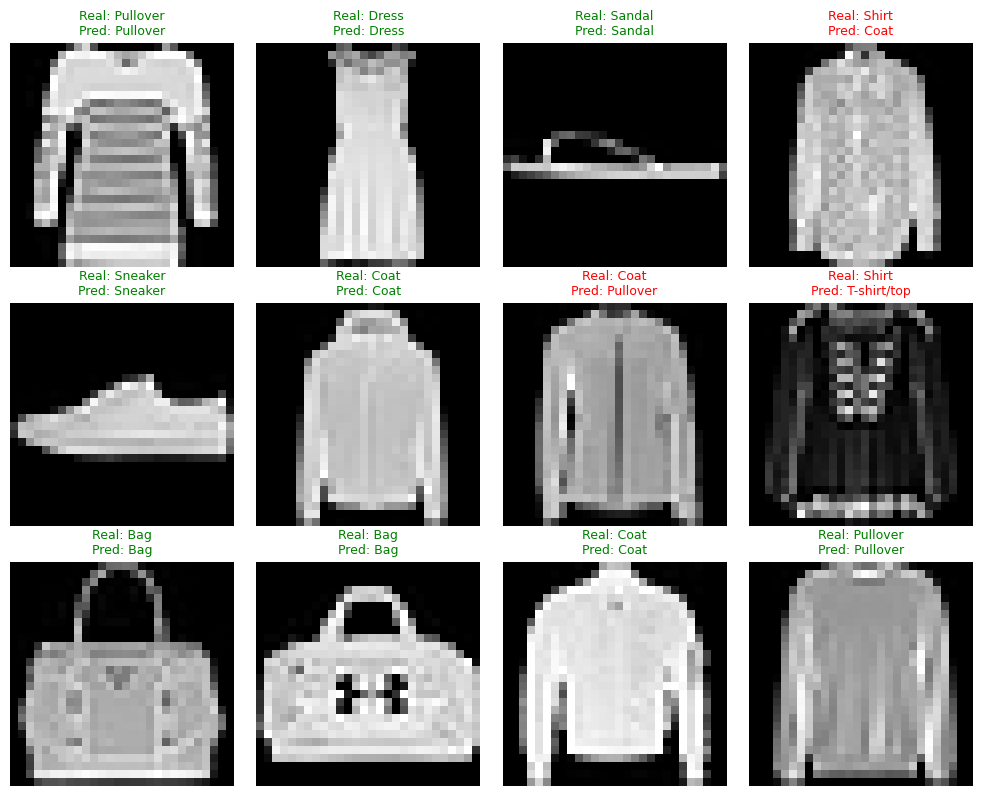

In [24]:
num_images = 12
indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(10,8))

for i, idx in enumerate(indices):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")

    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]

    color = "green" if y_test[idx] == y_pred[idx] else "red"

    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color, fontsize=9)
    plt.axis("off")

plt.tight_layout()
plt.show()
